# Credit Card Fraud Detection

IMPORTING LIBRARIES

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
import warnings
%matplotlib inline

DATA LOADING

In [19]:
df = pd.read_csv("D:\Jupyter-vs-code\creditcard.csv")

DATA PREPROCESSING

In [20]:
df.shape

(284807, 31)

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

MISSING VALUES

In [23]:
print('The Missing Values:',df.isnull().sum())

The Missing Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


DUPLICATE VALUES

In [24]:
df.duplicated().sum()

1081

In [25]:
df.drop_duplicates(df,inplace=True)

In [26]:
df.shape

(283726, 31)

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


PERFORM EDA

C:\Windows\Temp\ipykernel_14448\2745428076.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig)


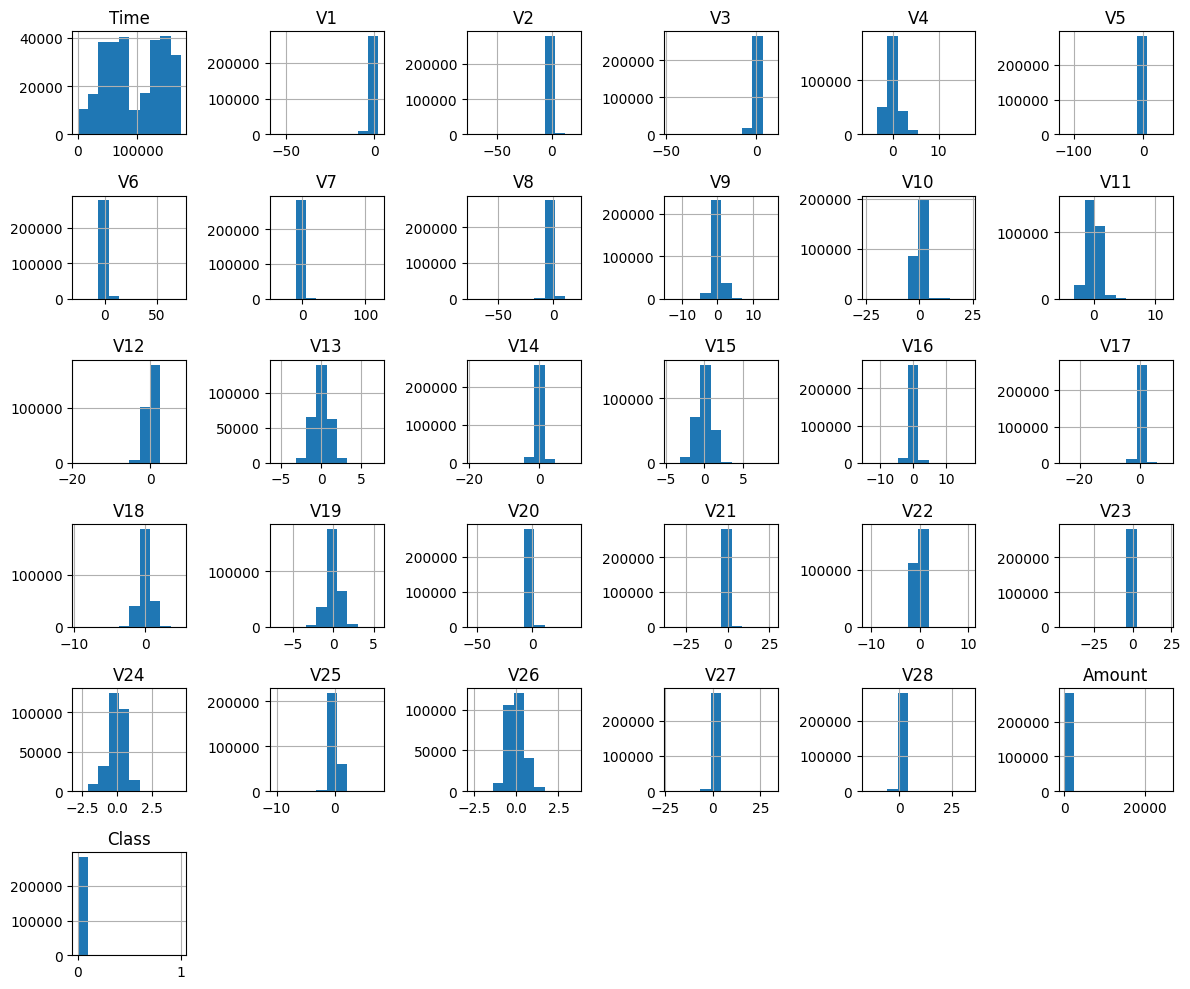

In [28]:
fig = plt.figure(figsize=(12,10))
df.hist(ax=fig)
plt.tight_layout()

In [29]:
print(df['Class'].value_counts())
print(df['Amount'].sort_values(ascending=False).head(10))

Class
0    283253
1       473
Name: count, dtype: int64


274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64


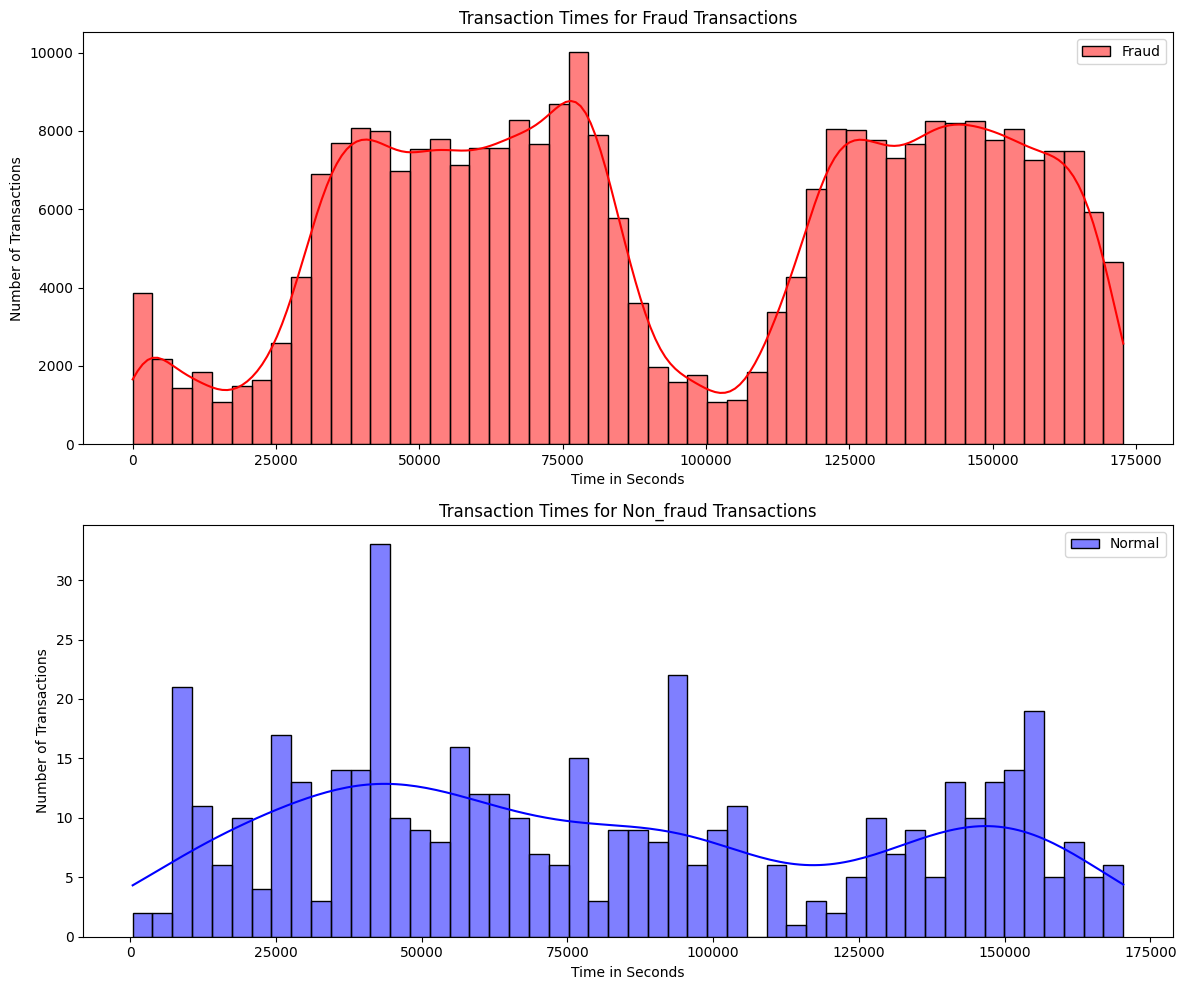

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#fraud transactions
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='red', label='Fraud', ax=ax1)
ax1.set_title('Transaction Times for Fraud Transactions')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

#normal transactions
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='blue', label='Normal', ax=ax2)
ax2.set_title('Transaction Times for Non_fraud Transactions')
ax2.set_xlabel('Time in Seconds')
ax2.set_ylabel('Number of Transactions')
ax2.legend()

plt.tight_layout()
plt.show()

ANAMOLY DETECTION


Anomaly detection is a technique used in machine learning to identify unusual patterns, behaviors, or instances in data that deviate from the norm. It is commonly applied in various domains such as finance, cybersecurity, manufacturing, and healthcare to detect anomalies or outliers that may indicate potential issues or abnormalities

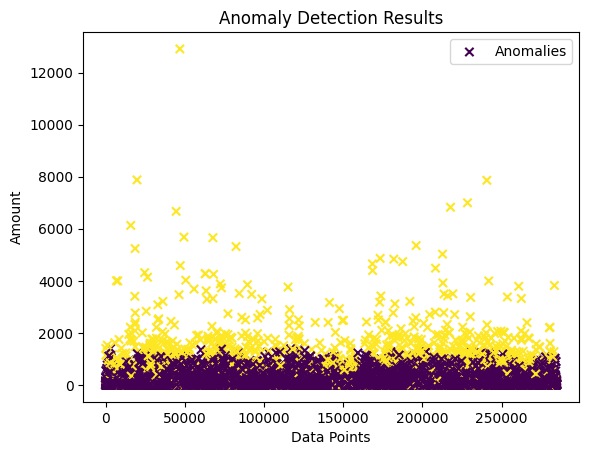

In [51]:
from sklearn.ensemble import IsolationForest
# Separate features and target variable
features = df.drop('Class', axis=1)
target = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train_scaled)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Visualize anomalies
plt.scatter(X_test.index, X_test['Amount'], c=y_pred, cmap='viridis', marker='x', label='Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Amount')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

FEATURE SCALING

In [32]:
features=[feature for feature in df.columns if feature not in ["Class"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[features])

StandardScaler()

AMOUNT DISTRIBUTION OF FRAUD AND NON FRAUD DATA

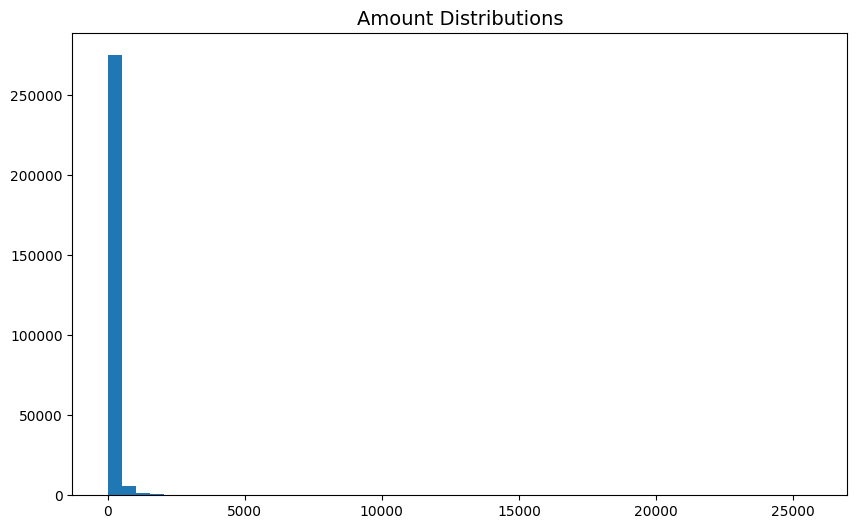

In [33]:
plt.figure(figsize=(10,6))
plt.hist(df['Amount'], bins=50)
plt.title('Amount Distributions', fontsize=14)
plt.show()

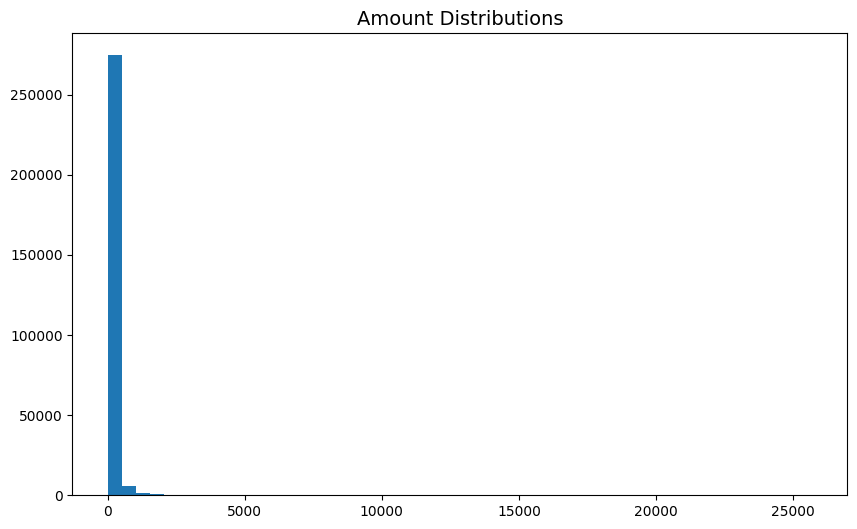

In [34]:
# check amount distribution for non_fraud
plt.figure(figsize=(10,6))
plt.hist(df[df['Class']==0]['Amount'], bins=50)
plt.title('Amount Distributions', fontsize=14)
plt.show()

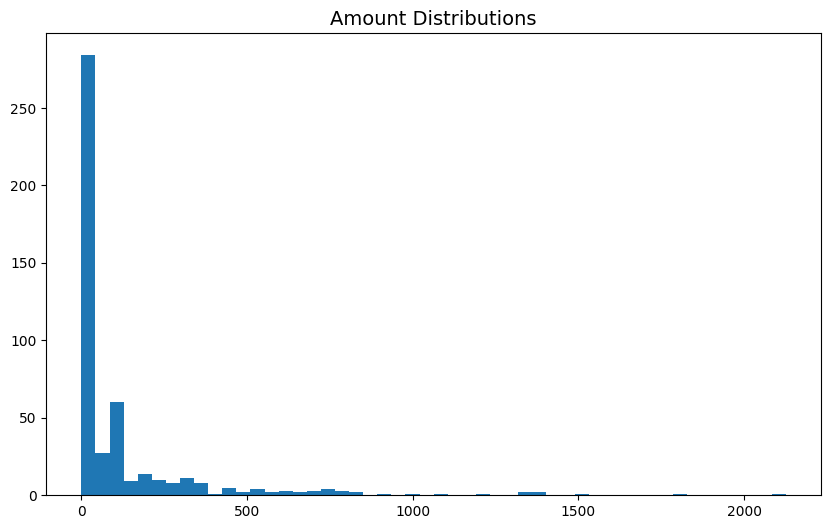

In [35]:
# check amount distribution for fraud
plt.figure(figsize=(10,6))
plt.hist(df[df['Class']==1]['Amount'], bins=50)
plt.title('Amount Distributions', fontsize=14)
plt.show()

FEATURE ENGINEERING

In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


X = df.drop('Class',axis=1)
y = df['Class']
# Build a logreg and compute the feature importances
model = LogisticRegression()
rfe = RFE(estimator=model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

c:\Users\spagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\spagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected features: ['V4', 'V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27']


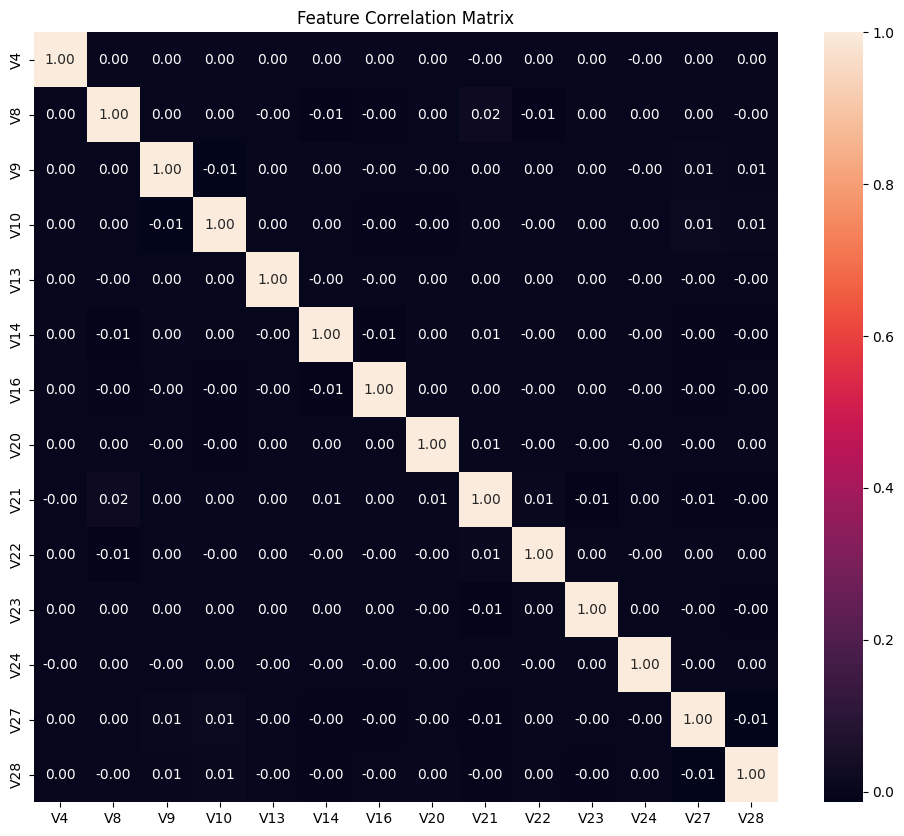

In [37]:
selected_features = ['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V20', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28']

plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

MACHINE LEARNING MODEL

Train/Test split results:
LogisticRegression accuracy is 0.999
LogisticRegression log_loss is 0.004
LogisticRegression auc is 0.982


C:\Windows\Temp\ipykernel_14448\2686655647.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Windows\Temp\ipykernel_14448\2686655647.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


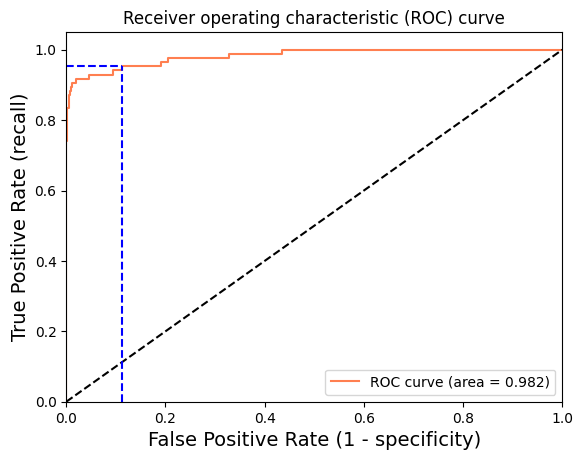

Using a threshold of 0.001 guarantees a sensitivity of 0.953 and a specificity of 0.888, i.e. a false positive rate of 11.24%.


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = df[selected_features]
y = df['Class']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14) ##Sensitivity
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
print(lr,":",classification_report(y_test,ypred))
print("")

LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.79      0.61      0.69        85

    accuracy                           1.00     56746
   macro avg       0.89      0.81      0.84     56746
weighted avg       1.00      1.00      1.00     56746




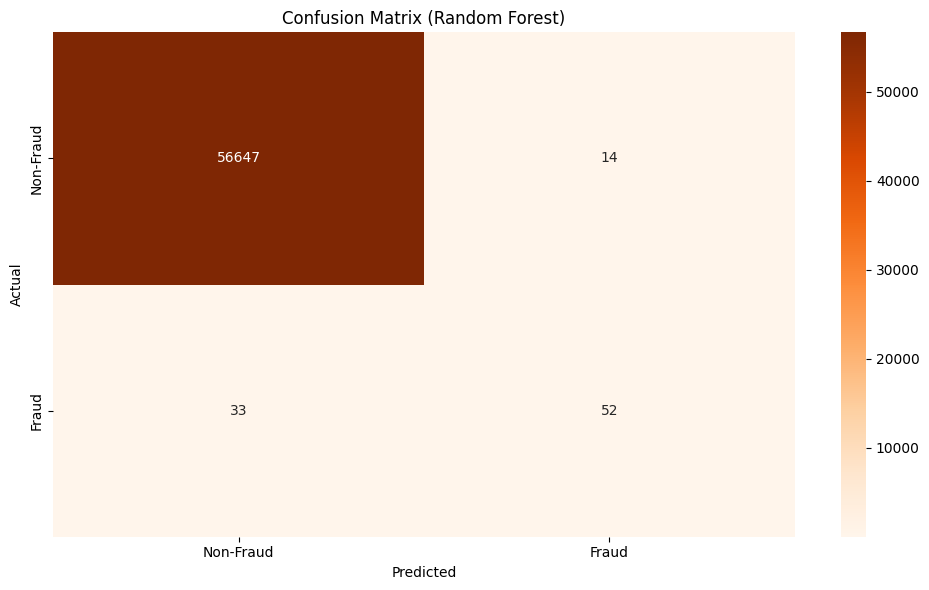

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create subplots
fig, ax = plt.subplots(1,  figsize=(10, 6))

# Plot confusion matrix for smote
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Oranges,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
ax.set_title('Confusion Matrix (Random Forest)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')



# Adjust layout and display
plt.tight_layout()
plt.show()

using SMOTE

As we can see, this data set is highly imbalanced in favour of non fraudulent transactions. One way of dealing with this is by oversampling using SMOTE.

SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic points close to other points, upsampling the minority class in order to reach an equal balance between the minority and majority class.

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X,y)
#Class distribution
print("Class distribution in the SMOTE oversampled training set:")
print(pd.Series(y_resampled_smote).value_counts(normalize=True) * 100)

Class distribution in the SMOTE oversampled training set:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [42]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Before SMOTE:", (y))
print("After SMOTE:", (y_smote))

Before SMOTE: 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64
After SMOTE: 0         0
1         0
2         0
3         0
4         0
         ..
566501    1
566502    1
566503    1
566504    1
566505    1
Name: Class, Length: 566506, dtype: int64


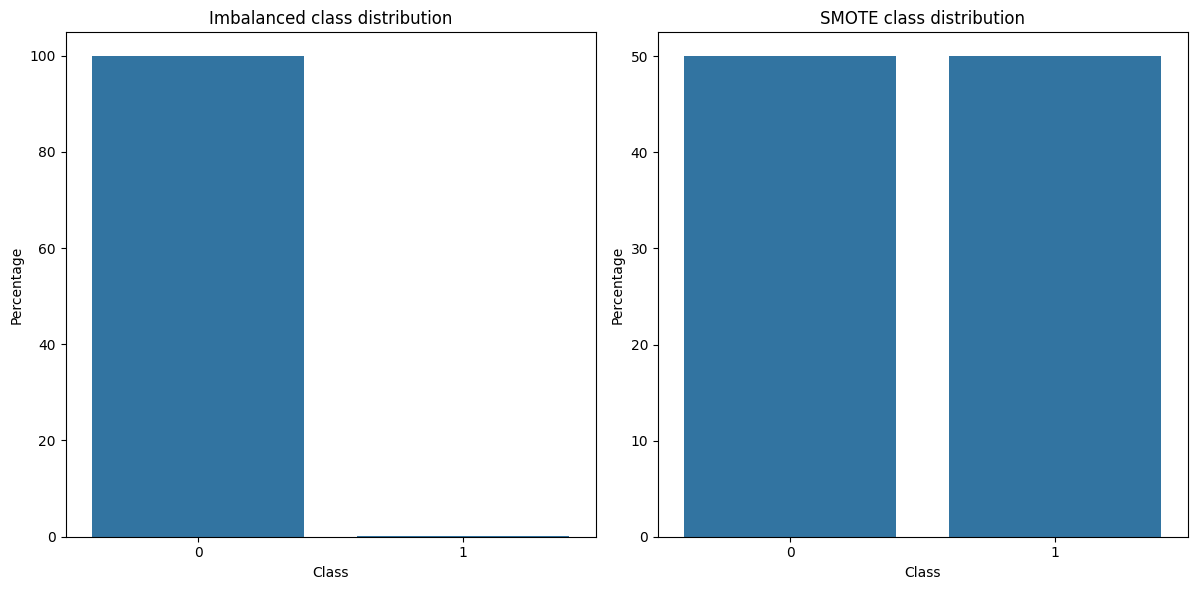

In [43]:
class_distr_before = pd.Series(y_train).value_counts(normalize=True) * 100
smote_class_distr = pd.Series(y_resampled_smote).value_counts(normalize=True) * 100


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=class_distr_before.index, y=class_distr_before.values)
plt.title('Imbalanced class distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.subplot(1, 3, 2)
sns.barplot(x=smote_class_distr.index, y=smote_class_distr.values)
plt.title('SMOTE class distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

Logistic Regression and Random Forest Classifier

Now that we have dealt with the imbalanced data we are able to build our model

As this is a classification problem we will be building a logistic regression model, a random forest model

In [44]:
LogReg_smote = LogisticRegression()

LogReg_smote.fit(X_resampled_smote, y_resampled_smote)

#Test and predict
y_pred_smote = LogReg_smote.predict(X_resampled_smote)
roc_auc_smote = roc_auc_score(y_resampled_smote, y_pred_smote)

report_smote = classification_report(y_resampled_smote, y_pred_smote)
print("Classification Report for Logistic Regression Model (SMOTE):")
print(report_smote)
print("ROC AUC:", roc_auc_smote)

Classification Report for Logistic Regression Model (SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    283253
           1       0.97      0.90      0.93    283253

    accuracy                           0.93    566506
   macro avg       0.93      0.93      0.93    566506
weighted avg       0.93      0.93      0.93    566506

ROC AUC: 0.9324879171623954


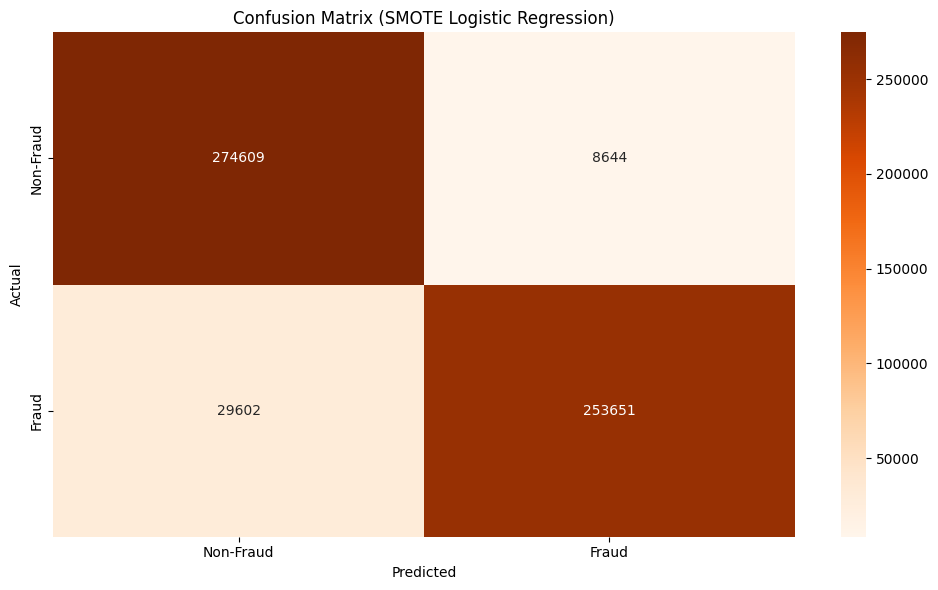

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix_smote = confusion_matrix(y_resampled_smote, y_pred_smote)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#smote
sns.heatmap(confusion_matrix_smote, annot=True, fmt='d', cmap=plt.cm.Oranges,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
ax.set_title('Confusion Matrix (SMOTE Logistic Regression)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

Text(158.22222222222223, 0.5, 'Actual')

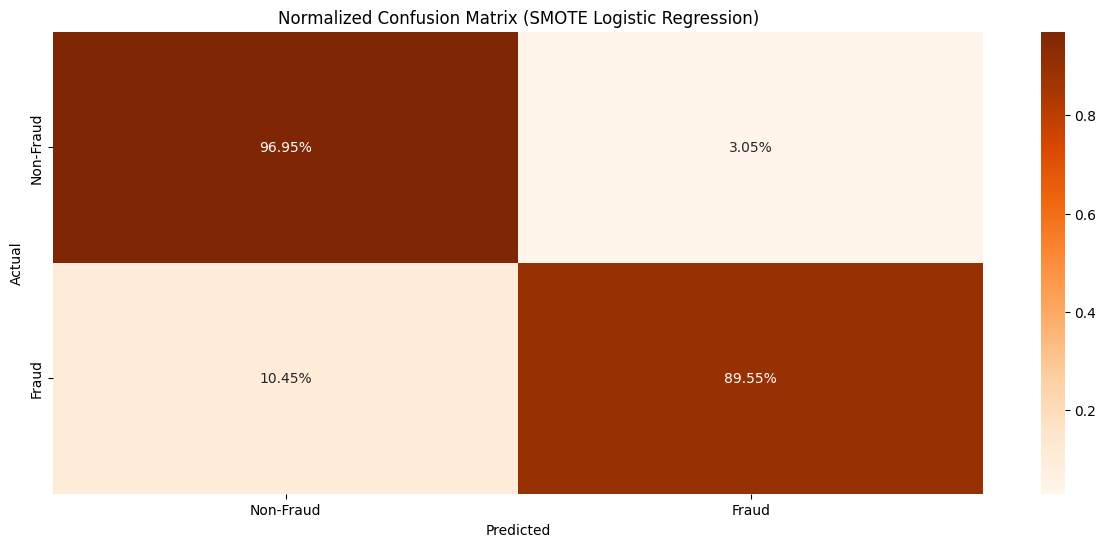

In [46]:
# Normalize the confusion matrices
normalized_confusion_matrix_smote = confusion_matrix_smote / confusion_matrix_smote.sum(axis=1, keepdims=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.heatmap(normalized_confusion_matrix_smote, annot=True, fmt='.2%', cmap=plt.cm.Oranges,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'],  cbar=True)
ax.set_title('Normalized Confusion Matrix (SMOTE Logistic Regression)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [47]:
random_forest_smote = RandomForestClassifier(max_depth=4, random_state=0)
random_forest_smote.fit(X_resampled_smote, y_resampled_smote)
# Test and predict
y_pred_smote_rf = random_forest_smote.predict(X_resampled_smote)

roc_auc_smote_rf = roc_auc_score(y_resampled_smote, y_pred_smote_rf)

report_smote_rf = classification_report(y_resampled_smote, y_pred_smote_rf)
print("Classification Report for Random Forest Classifier Model (SMOTE):")
print(report_smote_rf)
print("ROC AUC (SMOTE):", roc_auc_smote_rf)

Classification Report for Random Forest Classifier Model (SMOTE):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    283253
           1       0.99      0.87      0.93    283253

    accuracy                           0.93    566506
   macro avg       0.94      0.93      0.93    566506
weighted avg       0.94      0.93      0.93    566506

ROC AUC (SMOTE): 0.9324367261776574


Text(158.22222222222223, 0.5, 'Actual')

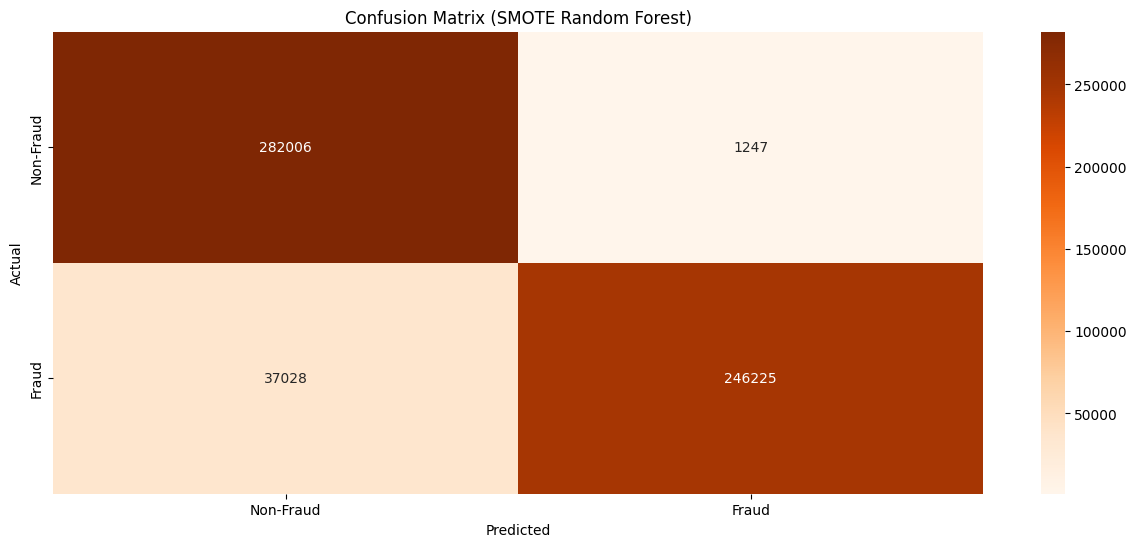

In [48]:
confusion_matrix_smote_rf = confusion_matrix(y_resampled_smote, y_pred_smote_rf)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#smote
sns.heatmap(confusion_matrix_smote_rf, annot=True, fmt='d', cmap=plt.cm.Oranges,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
ax.set_title('Confusion Matrix (SMOTE Random Forest)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

Text(158.22222222222223, 0.5, 'Actual')

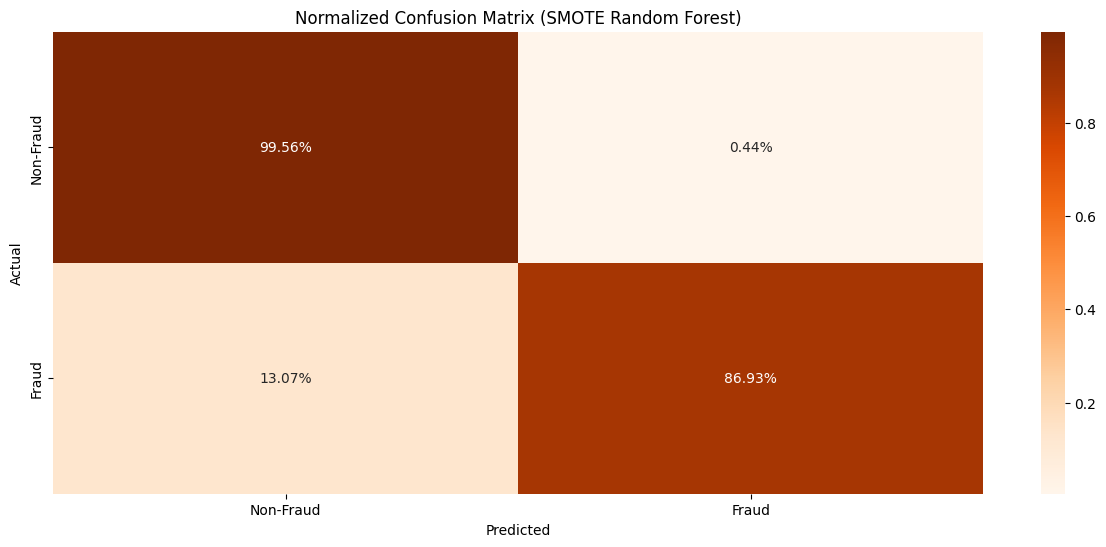

In [49]:
# Normalize the confusion matrices
normalized_confusion_matrix_smote_rf = confusion_matrix_smote_rf / confusion_matrix_smote_rf.sum(axis=1, keepdims=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))


sns.heatmap(normalized_confusion_matrix_smote_rf, annot=True, fmt='.2%', cmap=plt.cm.Oranges,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], cbar=True)
ax.set_title('Normalized Confusion Matrix (SMOTE Random Forest)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

From the results we can see that the Random Forest Classifier trained both models with higher percision, recall, F1 score and also ROC AUC
Logistc regression model showed lower levels of performanc

CONCLUSION

Detecting credit card fraud is a crucial aspect of ensuring the security and integrity of financial transactions. In conclusion, implementing a robust credit card fraud detection system is essential for both financial institutions and consumers. The advancements in technology have led to the development of sophisticated fraud detection algorithms and machine learning models that can analyze large volumes of transaction data in real-time.

By leveraging these technologies, financial institutions can significantly enhance their ability to identify and prevent fraudulent activities promptly. Additionally, continuous monitoring and adaptation of fraud detection systems are vital to staying ahead of evolving fraud tactics employed by cybercriminals.

It's important to recognize that no system is foolproof, and a multi-layered approach, combining advanced algorithms, artificial intelligence, behavioral analysis, and human oversight, provides the best defense against credit card fraud. Collaboration between financial institutions, law enforcement agencies, and cybersecurity experts is crucial to sharing information, staying informed about emerging threats, and collectively combating fraud on a broader scale.

In conclusion, the ongoing commitment to technological innovation, collaboration, and proactive measures is essential in the dynamic landscape of credit card fraud detection, ensuring a more secure financial environment for both businesses and consumers alike.